In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
%matplotlib inline

In [6]:
df.dtypes

DateRep                      datetime64[ns]
day                                   int64
month                                 int64
year                                  int64
Cases                                 int64
Deaths                                int64
Countries_and_territories            object
geoId                                object
countryterritoryCode                 object
popData2018                         float64
dtype: object

In [4]:
ren = {'dateRep':'DateRep', 'countriesAndTerritories':'Countries and territories',
       'cases':'Cases', 'deaths':'Deaths'}


df.rename(mapper = ren ,axis = 1, inplace=True)

In [5]:
df['Countries and territories'].unique()
df['DateRep'] = pd.to_datetime(df.DateRep)
df.columns = [c.replace(' ', '_') for c in df.columns]

In [60]:
'''
top_15 = ['United_States_of_America', 'Italy', 'China', 'Germany', 'Spain', 'Iran', 'France','United_Kingdom','Switzerland',
         'Belgium', 'Netherlands', 'Turkey', 'South_Korea', 'Austria', 'Canada', 'India']

'''
top_15 = ['United_States_of_America','Italy','China','Russia','Afghanistan','Bhutan','Nepal','United_Arab_Emirates','United_Kingdom']

In [61]:
df = df[(df['Cases'] !=0) & (df.Countries_and_territories.isin(top_15))].sort_values(by=['Countries_and_territories', 'DateRep'])

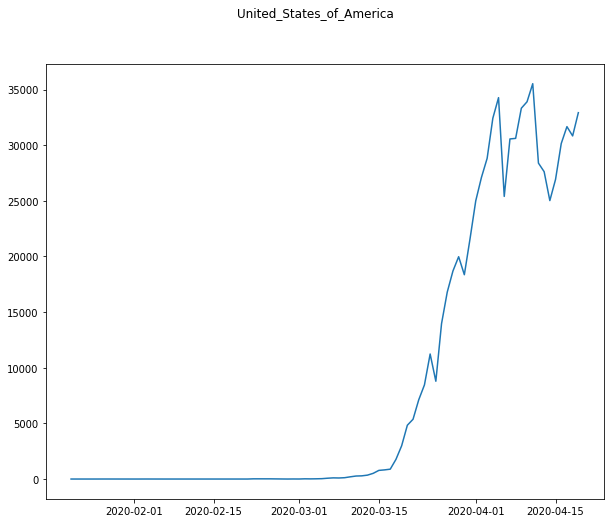

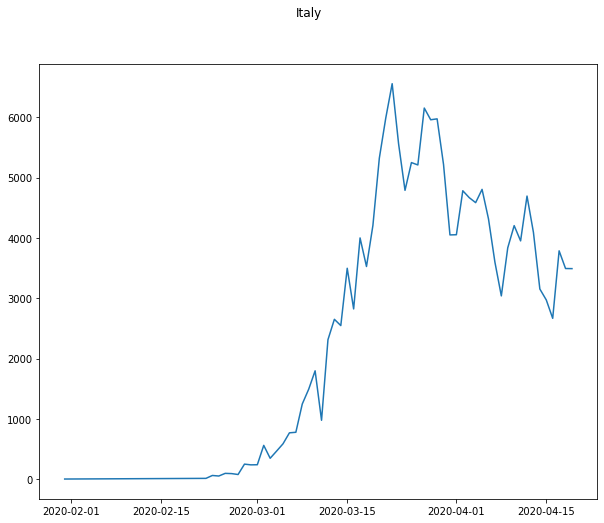

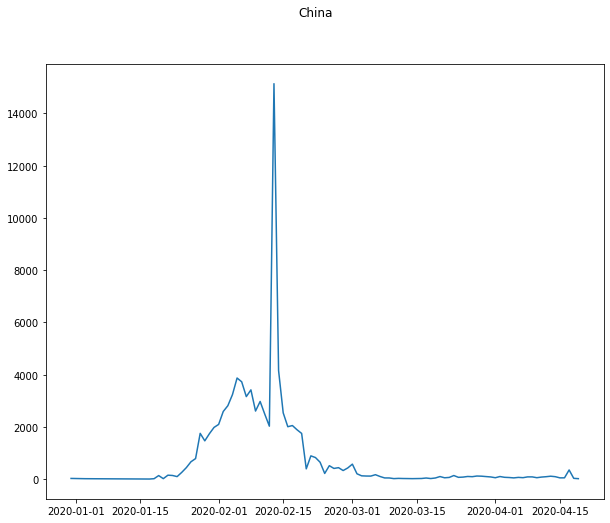

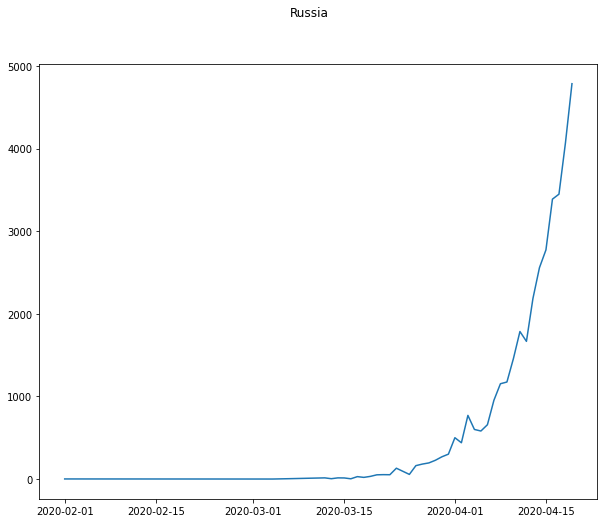

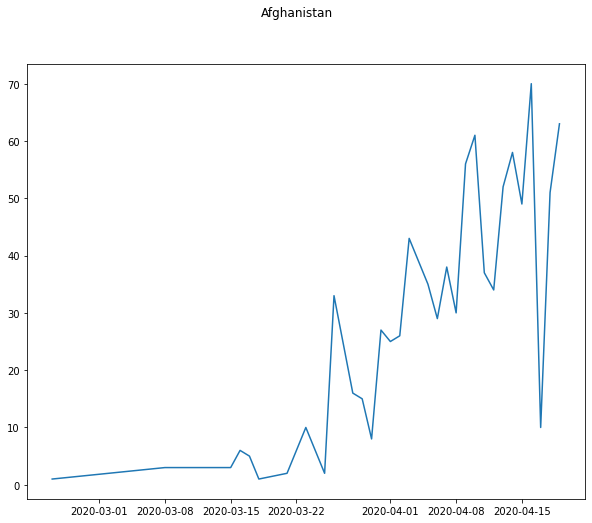

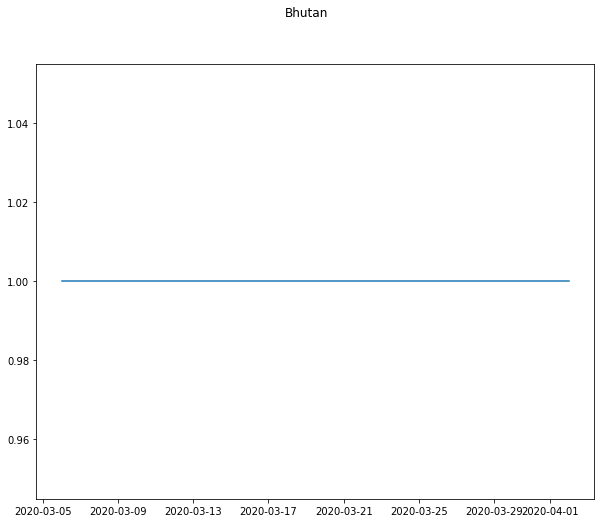

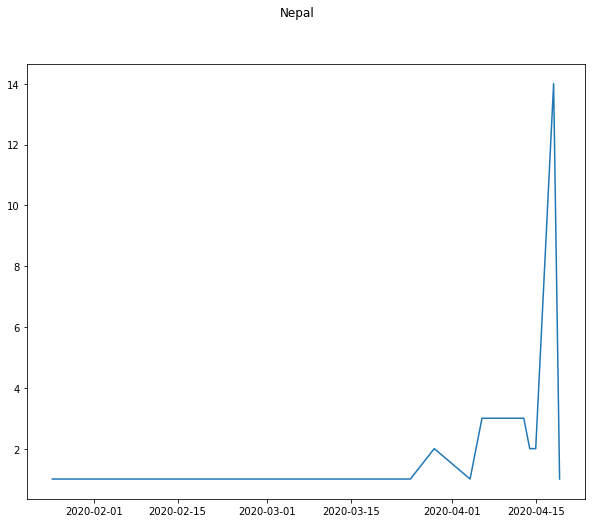

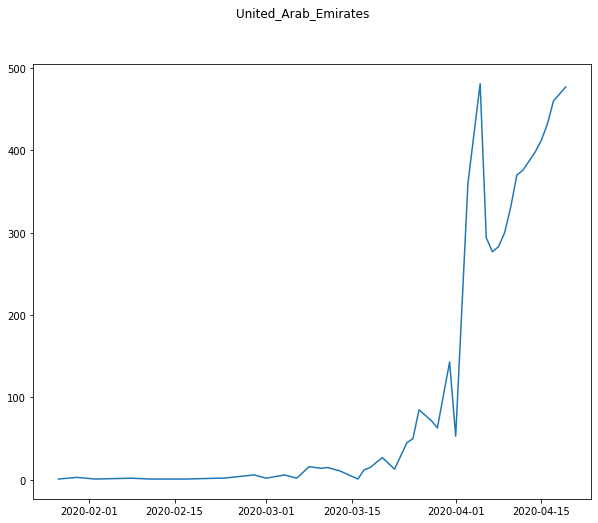

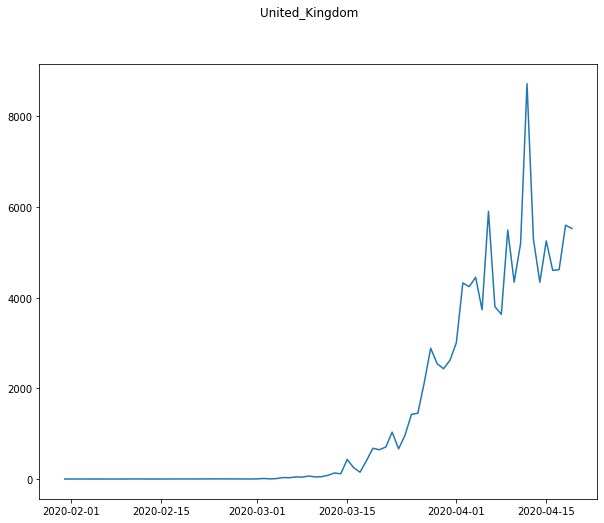

In [62]:
for country in top_15:   
    fd = df[df['Countries_and_territories'] == country]
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(country)
    plt.plot(fd['DateRep'], fd['Cases'])

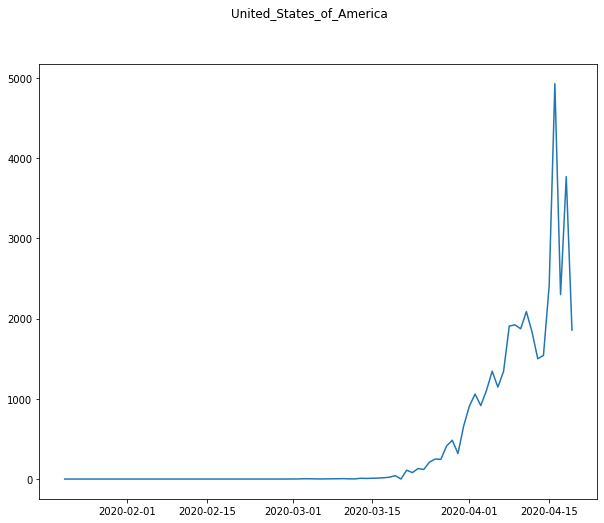

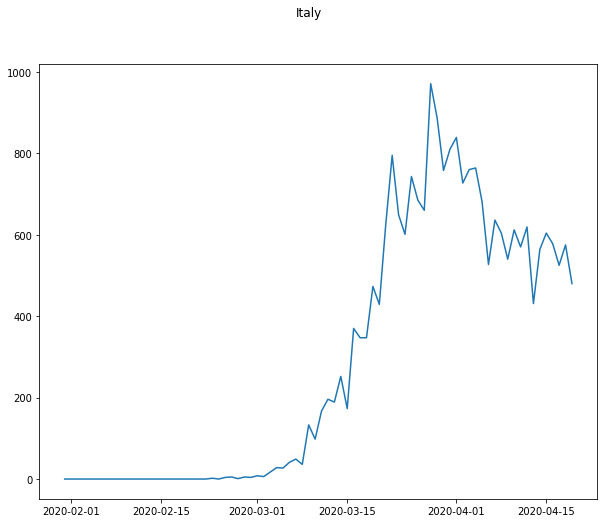

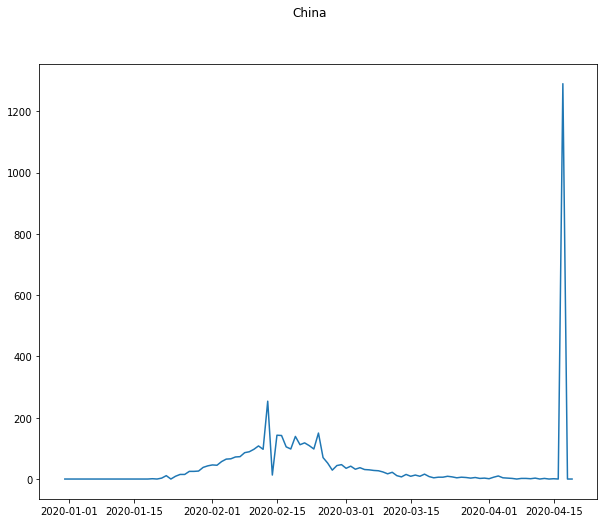

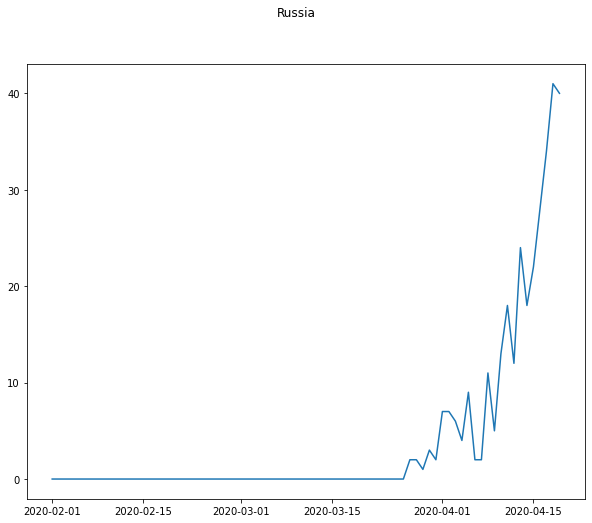

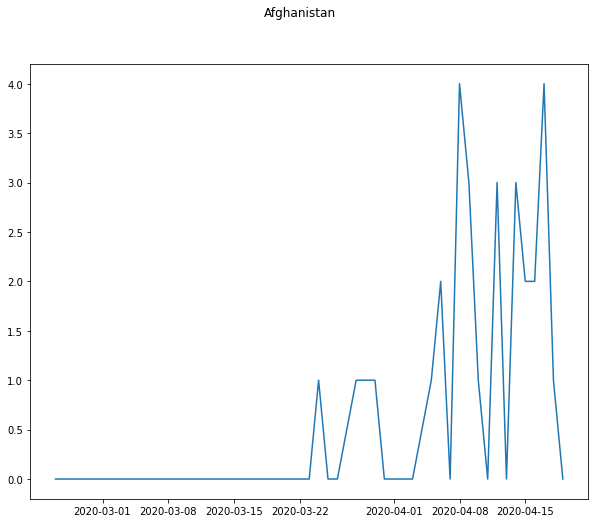

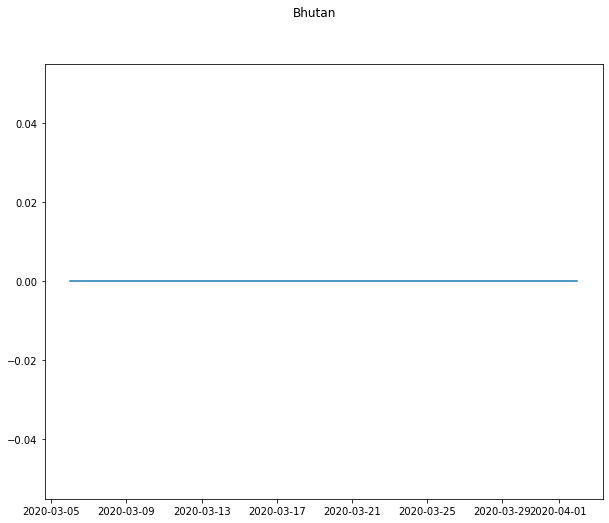

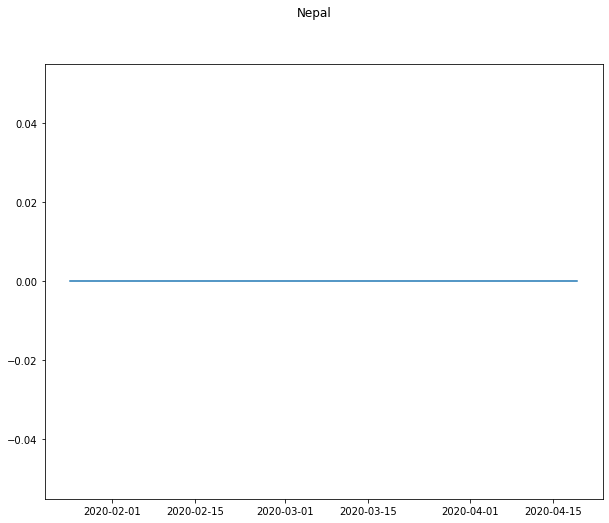

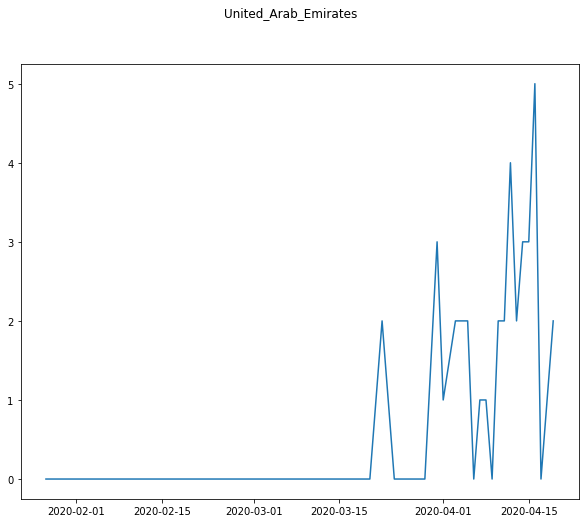

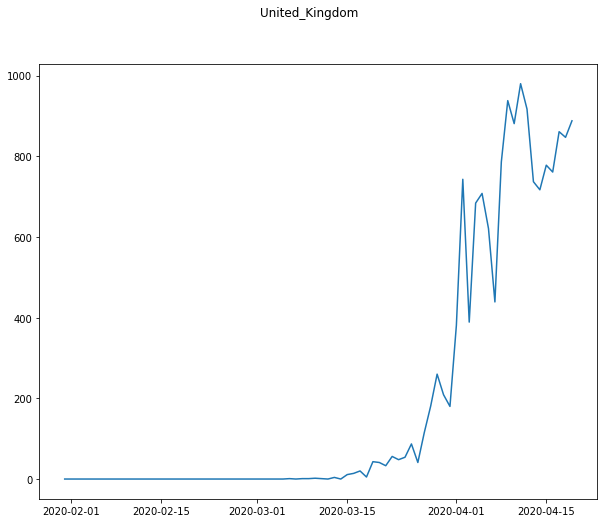

In [63]:
for country in top_15:   
    fd = df[df['Countries_and_territories'] == country]
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(country)
    plt.plot(fd['DateRep'], fd['Deaths'])

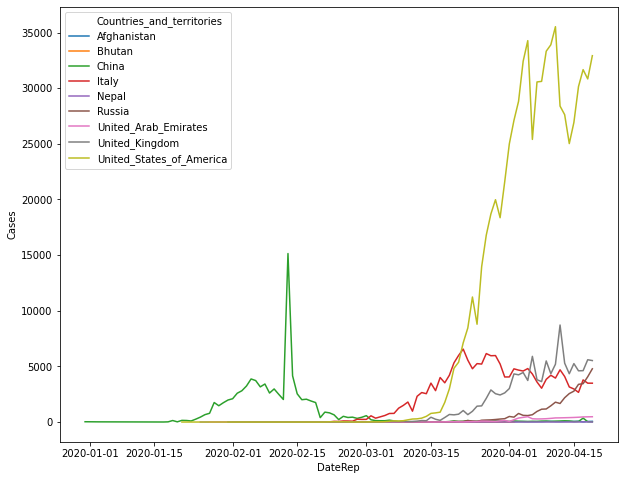

In [64]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'DateRep', y='Cases', data =df, hue='Countries_and_territories')

In [65]:
fd = df
fd = df.sort_values(by = ['Countries_and_territories', 'DateRep'], ascending=[False, True])

In [66]:
for i in range(1, len(fd)):
    if fd['Countries_and_territories'].iloc[i] == fd['Countries_and_territories'].iloc[i-1]:
        fd['Cases'].iloc[i] += fd['Cases'].iloc[i-1]

F:\Anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [67]:
for i in range(1, len(fd)):
    if fd['Countries_and_territories'].iloc[i] == fd['Countries_and_territories'].iloc[i-1]:
        fd['Deaths'].iloc[i] += fd['Deaths'].iloc[i-1]

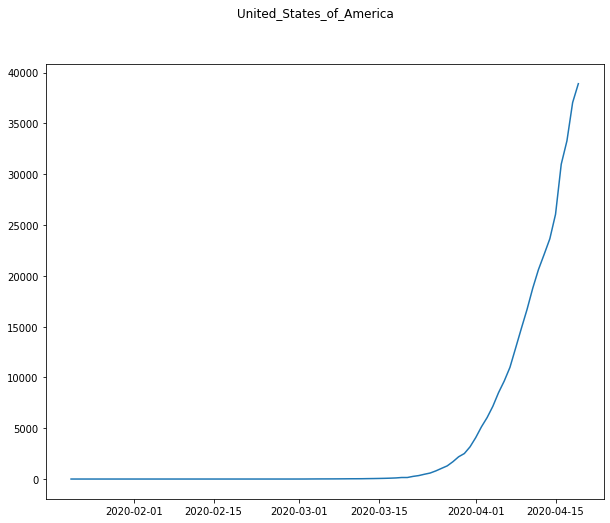

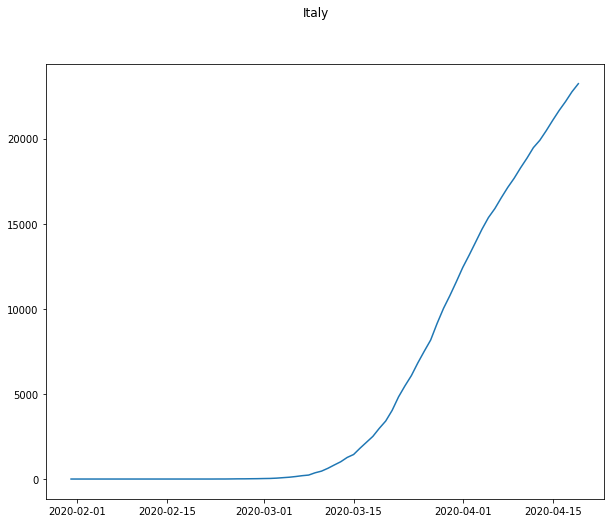

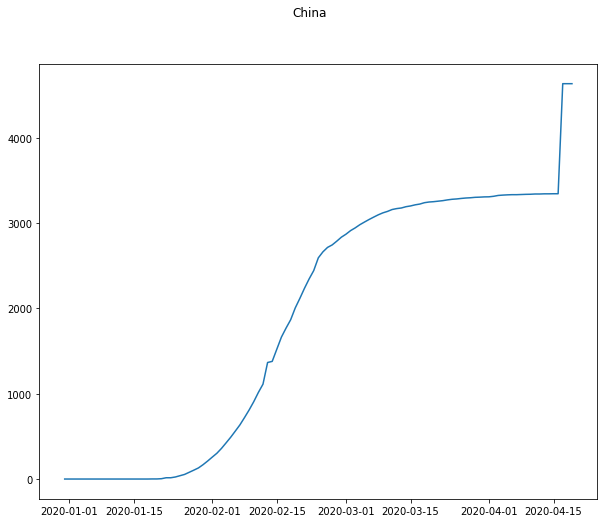

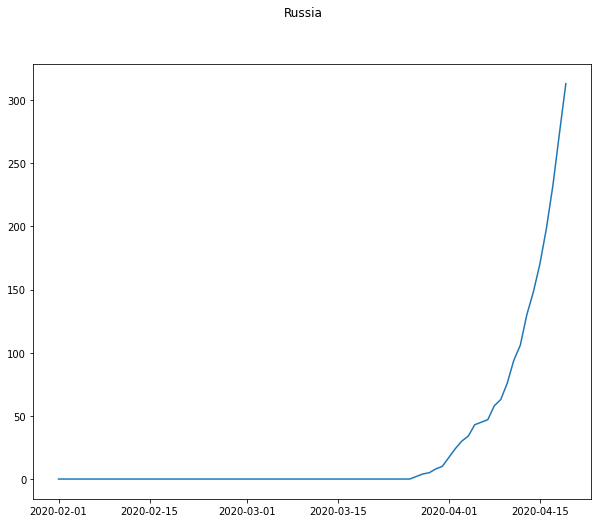

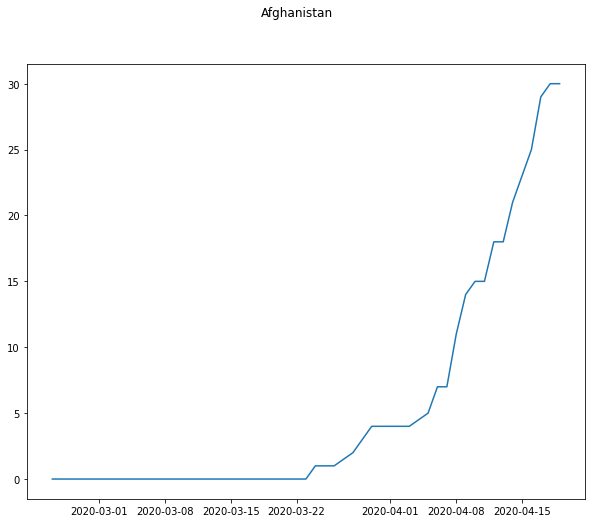

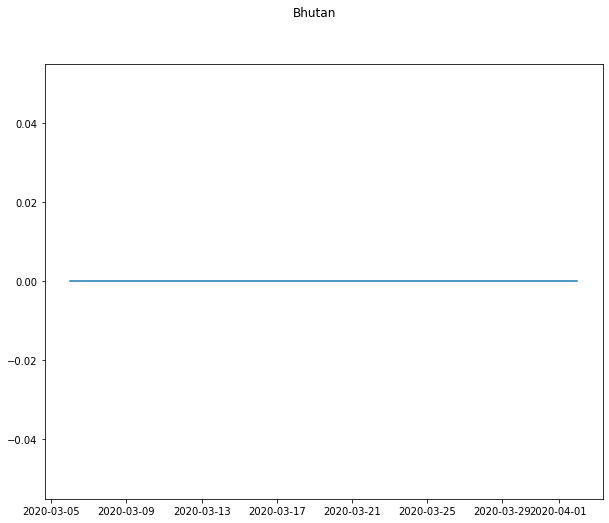

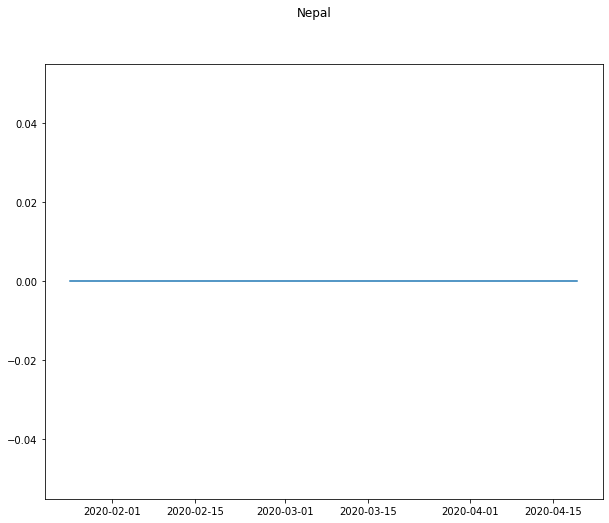

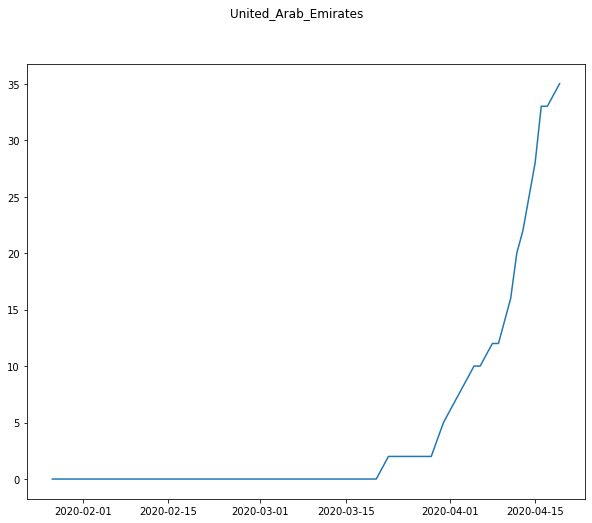

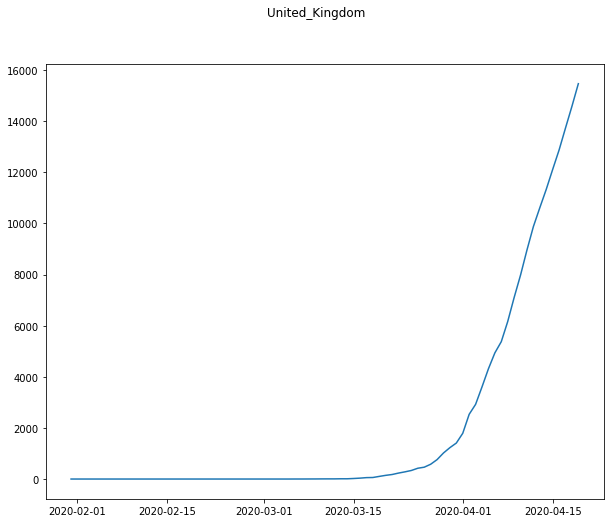

In [68]:
for country in top_15:   
    xd = fd[fd['Countries_and_territories'] == country]
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(country)
    plt.plot(xd['DateRep'], xd['Deaths'])

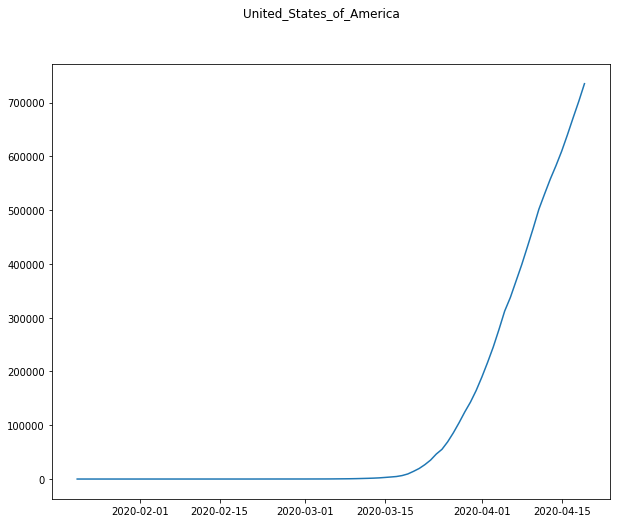

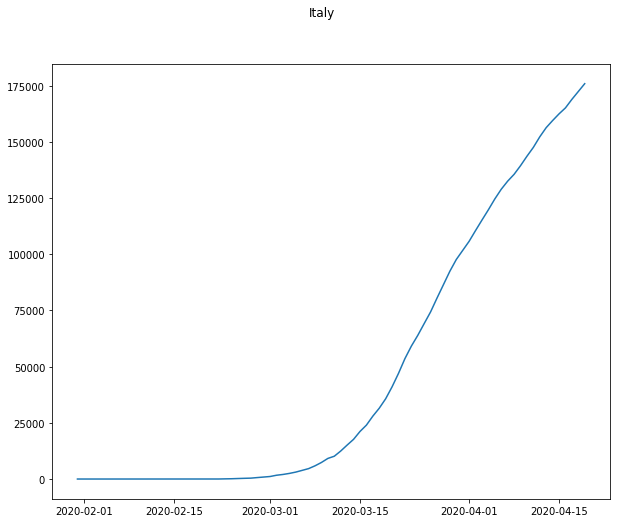

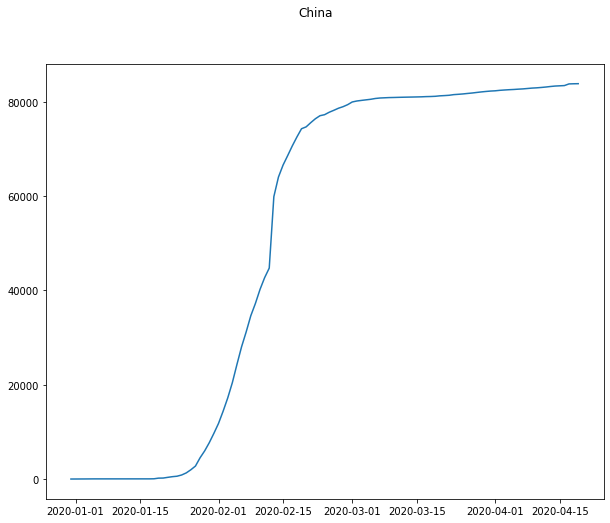

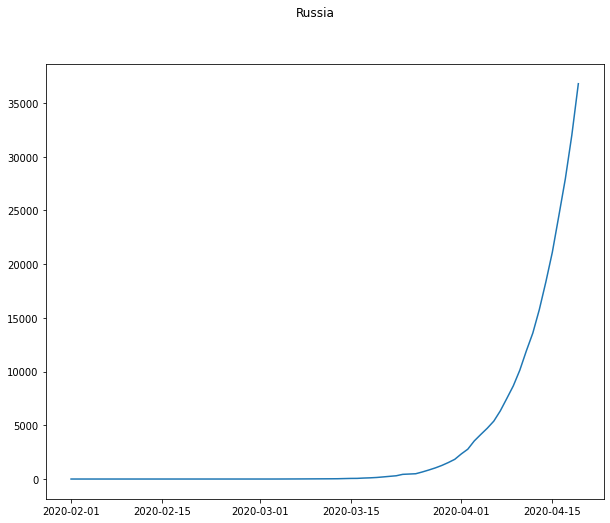

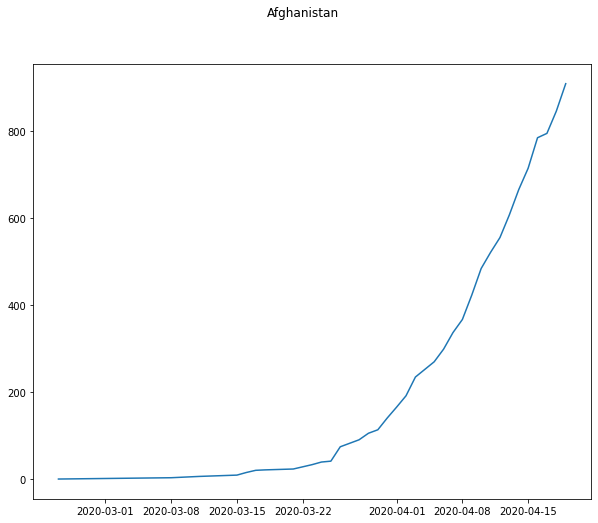

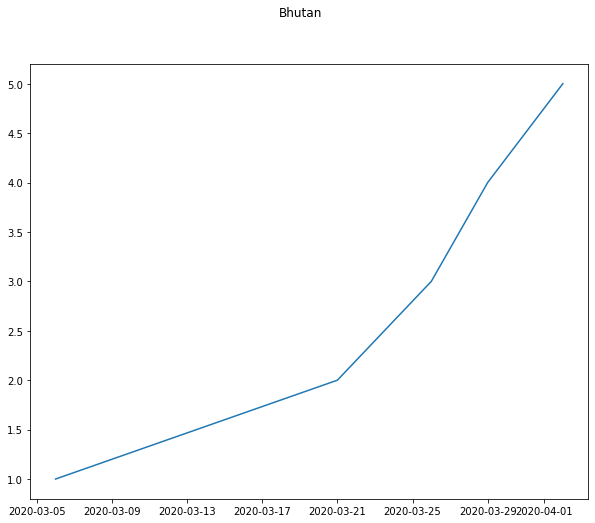

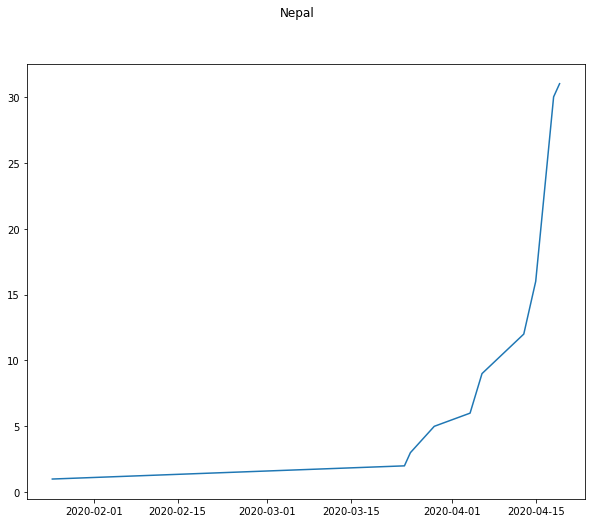

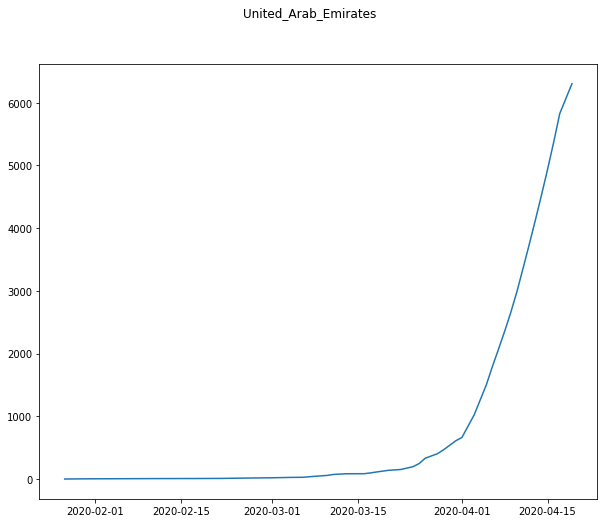

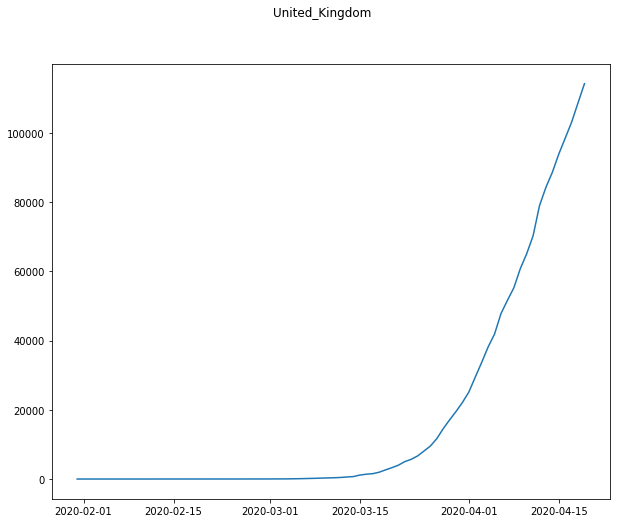

In [69]:
for country in top_15:   
    xd = fd[fd['Countries_and_territories'] == country]
    fig = plt.figure(figsize=(10,8))
    fig.suptitle(country)
    plt.plot(xd['DateRep'], xd['Cases'])

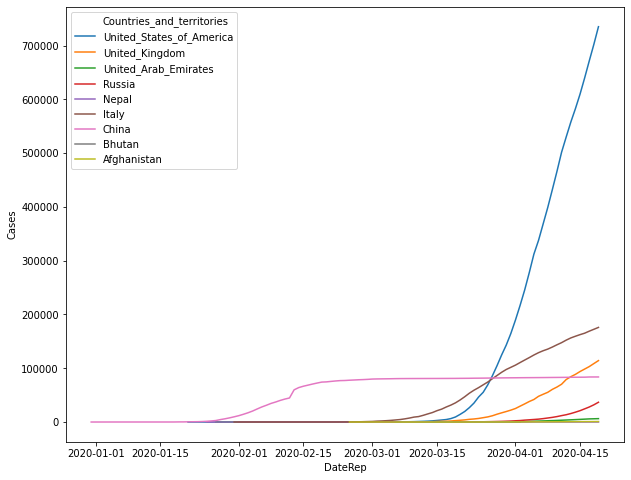

In [70]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'DateRep', y='Cases', data =fd, hue='Countries_and_territories')

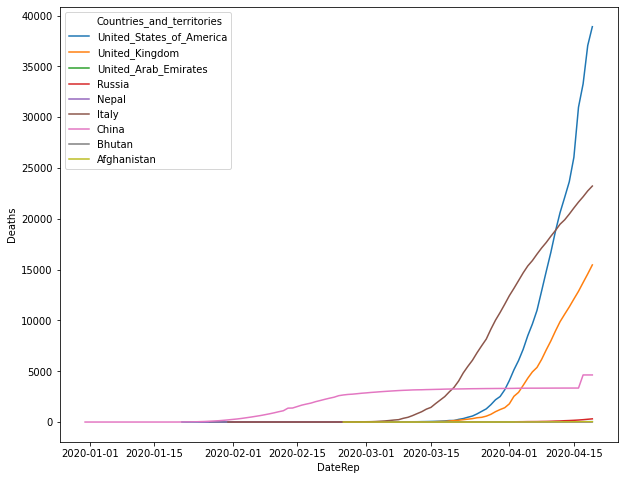

In [71]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'DateRep', y='Deaths', data =fd, hue='Countries_and_territories')